In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
import random as rm
import math

In [21]:
a = sum (np.random.binomial(1000, 1/6))
print (a)

188


# G2P6

In [2]:
a = 1 - stats.binom.pmf (0,25,1/36)
a

0.5055315462383781

## G2P13

In [42]:
# Resolución.
rate = 2 # Es el valor de Mu
n = np.arange(0,8) # Son todos los posibles valores de k.
y = stats.poisson.pmf(n,rate)
lista_y = y.tolist()
prob_0_7 = sum (lista_y) #Proba de que se detecten 0 ,1 ... o 7 neutrinos.
prob_8_n = 1 - prob_0_7
print (prob_0_7)
print (prob_8_n)

0.9989032810321412
0.0010967189678587896


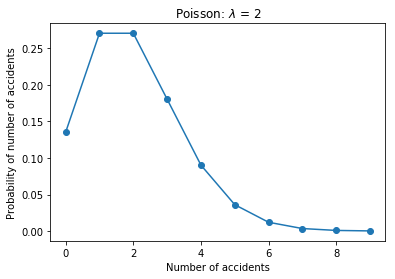

In [32]:
# Para probar el grafico
plt.plot (n, y, "o-")
plt.title ("Poisson: $\lambda$ = %r" %rate)
plt.xlabel ("Number of accidents")
plt.ylabel ("Probability of number of accidents")
plt.show()

## Referencias.
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html
* https://bigdata-madesimple.com/how-to-implement-these-5-powerful-probability-distributions-in-python/

## G2P15

In [16]:
rango = np.arange (0,30)
a = stats.nbinom.pmf (rango,100,0.80)
lista_a = a.tolist()
prob_100_130 = sum(lista_a)
prob_130_inf = 1 - prob_100_130
prob_130_inf

0.20554301050623336

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.nbinom.html

# G3P1

In [19]:
x = np.arange (0,195,0.0001)
y = stats.norm.pdf(x,175,8)
resultado = sp.integrate.simps (y,x) # Con esto integro dos muestras. No puedo usar la funcion que integra una función, porque 
#"y" es un array con los valores de la distribución normal para cada valor de x.
resultado
# plt.plot (x,y)
# plt.show()

0.9937901155670443

# G3P5

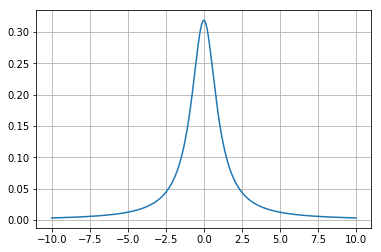

In [14]:
a = 1
b = 0
t = np.arange (-10,10,0.00001)
y = lambda t: a/(3.14*(a**2+(t-b)**2))

plt.plot (t,y(t))
plt.grid ()
plt.show()

# G6P15

In [21]:
# Punto a.
f1 = 1
f2 = lambda x: x
f3 = lambda x: x ** 2

x = [-0.6,-0.2,0.2,0.6]
y = np.array([[5,3,5,8]])
s=  [2,1,1,2]


A = np.array ([[f1,f2(x[0]),f3(x[0])],[f1,f2(x[1]),f3(x[1])],[f1,f2(x[2]),f3(x[2])],[f1,f2(x[3]),f3(x[3])]])
V = np.array ([[s[0] ** 2,0,0,0],[0,s[1] ** 2,0,0], [0,0,s[2]**2,0],[0,0,0,s[3]**2]])

aux1 = np.dot(np.linalg.inv(V),A)
aux2 = np.dot(A.transpose(),aux1)
aux3 = np.linalg.inv(aux2)

aux4 = np.dot(np.linalg.inv(V),y.transpose())
aux5 = np.dot(A.transpose(),aux4)

parametros = np.dot (aux3,aux5)

print (parametros)

[[3.6875    ]
 [3.26923077]
 [7.8125    ]]


In [57]:
# Punto b. 
# FALTA HALLAR EL VALOR DE LA VARIANZA DE Y. 
# FALTA HALLAR a1, a2, a3 EN FUNCIÓN DE (X,Y).
f1 = 1
f2 = lambda x: x
f3 = lambda x: x ** 2

x = [-0.6,-0.2,0.2,0.6]
y = np.array([[5,3,5,8]])
s = 18985 * np.array([[1,1,1,1]])


A = np.array ([[f1,f2(x[0]),f3(x[0])],[f1,f2(x[1]),f3(x[1])],[f1,f2(x[2]),f3(x[2])],[f1,f2(x[3]),f3(x[3])]])
V = np.array ([[s[0][0] ** 2,0,0,0],[0,s[0][1] ** 2,0,0], [0,0,s[0][2]**2,0],[0,0,0,s[0][3]**2]])

aux1 = np.dot(np.linalg.inv(V),A)
aux2 = np.dot(A.transpose(),aux1)
aux3 = np.linalg.inv(aux2)

aux4 = np.dot(np.linalg.inv(V),y.transpose())
aux5 = np.dot(A.transpose(),aux4)

parametros = np.dot (aux3,aux5)

print (parametros[2][0])

7.812499999999993


# G7P3

In [6]:
x = [1002,1000,997,1001,1001,999,998,999,1000,1003]
promedio = sum(x)/len(x)

sumatoria = 0
for i in range (len(x)):
    aux1 = (x[i] - promedio)**2
    sumatoria = sumatoria + aux1
    
print (sumatoria/3.32)

9.036144578313253


# G7P6

-1.5408611004389907 16.330091699571604 1.1563776413260507 1.078556228587602 1.0373550768929392


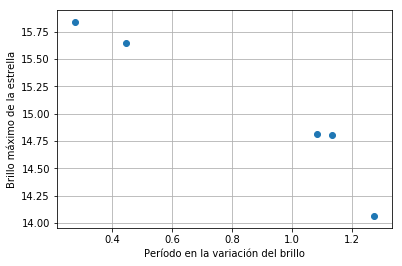

In [47]:
# Datos y ajuste de los parámetros alfa y beta.
Pi = [18.71,2.79,13.61,12.08,1.89]
Fi = [4854,2586,3752,3753,2605]
ti = [200,100,150,150,100]

Fc = 1021
tc = 100

Bi = lambda Fi,ti: (Fi/ti) - (Fc/tc)

P = [] # #Mi variable X.
B = [] # Mi variable Y.
for j in range (len (Fi)):
    B.append(Bi(Fi[j],ti[j]))
    P.append(math.log10(Pi[j]))

alfa,beta,_,_,_ = stats.linregress (P,B)

# Cálculo del error en B.
aux1 = 0
for i in range (len(Fi)):
    aux2 = ((1/(ti[i]))**2) * Fi[i]
    aux1 = aux1 + aux2

aux3 = (1/tc)**2 * Fc    
sigma_B = math.sqrt (aux1 + aux3)

## ------------ Cálculo auxiliares para la matriz de covarianza de los parámetros ------------ ##
suma_cuadrados_P = 0
for i in range (len(P)):
    aux4 = P[i]**2
    suma_cuadrados_P = suma_cuadrados_P + aux4

suma_P = sum (P)
N = len(P)
delta = N*suma_cuadrados_P - suma_P **2

## ------------ Cálculo de la matriz de covarianza de los parámetros ------------ ##
sigma_beta = math.sqrt (sigma_B**2/delta * suma_cuadrados_P)
sigma_alfa = math.sqrt (sigma_B**2/delta * N)
cov_beta_alfa = - suma_P * sigma_B**2 / delta

print (alfa,beta,sigma_alfa,sigma_beta,sigma_B)

plt.scatter (P,B)
plt.grid ()
plt.xlabel ("Período en la variación del brillo")
plt.ylabel ("Brillo máximo de la estrella")
plt.show ()